<a href="https://colab.research.google.com/github/rashaubaid/PaisaaBazaar-EDA/blob/main/PaisaaBazaar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Type:- EDA Paisabazaar

## ***Project Summary:-***
  This project focuses on analyzing financial and demographic data to understand factors influencing credit scores. The dataset includes customer attributes such as income, occupation, loan history, debt, and repayment behavior. Exploratory Data Analysis (EDA) is performed to uncover trends, patterns, and correlations between variables and credit score categories. Feature engineering and preprocessing steps prepare the data for modeling. Machine learning models, including Logistic Regression, Random Forest, and XGBoost, are trained and evaluated to predict credit scores. The project highlights key drivers of creditworthiness and provides insights for improving financial decision-making and risk assessment.


## ***Problem Statement:-***
  Financial institutions face challenges in accurately assessing an individual’s creditworthiness, which directly impacts lending decisions and risk management. Traditional methods often fail to capture complex relationships between demographic, income, and credit history variables, leading to misclassification of customers. This project aims to develop a data-driven solution that analyzes customer financial data and predicts credit scores effectively. By leveraging exploratory data analysis and machine learning models, the goal is to identify key factors influencing credit scores and build predictive models that assist organizations in minimizing risk while ensuring fair and reliable credit evaluation.

## ***General guidelines:***


1.  **Understand the Dataset** – Explore the data thoroughly using EDA to identify trends, patterns, missing values, and outliers.

2.  **Data Preprocessing** – Handle null values, duplicates, and outliers; encode categorical variables; normalize/scale numerical features if required.

3.  **Feature Engineering** – Select and transform important variables to improve model performance.

4. **Model Building**– Train multiple machine learning models and compare their performance using suitable metrics.

5.  **Model Evaluation** – Use confusion matrices, classification reports, and feature importance for insights.




Code:-

1. Import Libraries & Load Data

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
plt.style.use("seaborn-v0_8")


In [ ]:
# Load dataset
df = pd.read_csv("/content/dataset-2.csv")   # change path if needed

# First look
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


2. Dataset Overview


In [ ]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Info of dataset
df.info()

# Statistical summary
df.describe(include="all").T


Shape of dataset: (81782, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81782 entries, 0 to 81781
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        81782 non-null  int64  
 1   Customer_ID               81782 non-null  int64  
 2   Month                     81782 non-null  int64  
 3   Name                      81782 non-null  object 
 4   Age                       81782 non-null  float64
 5   SSN                       81782 non-null  float64
 6   Occupation                81782 non-null  object 
 7   Annual_Income             81782 non-null  float64
 8   Monthly_Inhand_Salary     81782 non-null  float64
 9   Num_Bank_Accounts         81782 non-null  float64
 10  Num_Credit_Card           81782 non-null  float64
 11  Interest_Rate             81782 non-null  float64
 12  Num_of_Loan               81782 non-null  float64
 13  Type_of_Loan              81782

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,81782.0,NaN,NaN,NaN,66968.000037,35412.861263,5634.0,36299.25,66968.5,97636.75,128303.0
Customer_ID,81782.0,NaN,NaN,NaN,26072.528013,14317.093035,1006.0,13891.0,25970.0,38431.0,50999.0
Month,81782.0,NaN,NaN,NaN,4.499927,2.291281,1.0,2.25,4.0,6.0,8.0
Name,81782,8582,Langep,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,81782.0,NaN,NaN,NaN,33.380927,10.748936,14.0,25.0,33.0,42.0,56.0
SSN,81782.0,NaN,NaN,NaN,499987806.259446,290614460.582408,403312.0,243738549.0,498865960.0,755928647.75,999993421.0
Occupation,81782,15,Lawyer,5904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,81782.0,NaN,NaN,NaN,50425.880015,38379.489827,7005.93,19267.17,36783.38,71614.2,179987.28
Monthly_Inhand_Salary,81782.0,NaN,NaN,NaN,4190.808044,3192.089768,319.55625,1624.751667,3068.576667,5954.646667,15204.633333
Num_Bank_Accounts,81782.0,NaN,NaN,NaN,5.367086,2.588993,0.0,3.0,6.0,7.0,11.0


3. Data Dictionary

### ***Markdown:***
      Column	                                           Description    

      1.  Age     	                                      Age of customer
      2.  Occupation	                                  Type of job (Scientist, Teacher, Engineer, etc.)
      3.  Annual_Income	                                  Total yearly income
      4.  Monthly_Inhand_Salary	                          Net salary credited per month
      5.  Num_Bank_Accounts	                              No. of bank accounts
      6.  Num_Credit_Card	                              No. of credit cards
      7.  Interest_Rate	                              Interest rate on credit
      8.  Num_of_Loan	                                No. of loans taken
      9.  Delay_from_due_date	                        Average days payment delayed
      10.  Num_of_Delayed_Payment	                    Count of delayed payments
      11.  Changed_Credit_Limit	                       Change in credit limit
      12.  Num_Credit_Inquiries	                        No. of credit inquiries
      13.  Credit_Mix	                              Quality of credit mix (Good, Bad, Standard)
      14.  Outstanding_Debt	                          Total outstanding debt
      15.  Credit_History_Age	                        Credit history in months
      16.  Payment_Behaviour	                          Payment pattern
      17.  Monthly_Balance	                              Remaining balance after expenses
      18.  Credit_Score	                                Target (Good, Standard, Poor)

4. Missing Values Check

In [ ]:
# Missing values
df.isnull().sum().sort_values(ascending=False)


,0
Payment_Behaviour,1
Monthly_Balance,1
Credit_Score,1
ID,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Customer_ID,0


In [ ]:
# % of missing values
(df.isnull().mean() * 100).sort_values(ascending=False).head(10)


,0
Payment_Behaviour,0.001223
Monthly_Balance,0.001223
Credit_Score,0.001223
ID,0.000000
Age,0.000000
SSN,0.000000
Occupation,0.000000
Annual_Income,0.000000
Monthly_Inhand_Salary,0.000000
Customer_ID,0.000000


In [ ]:
# Drop ID-related columns
df = df.drop(columns=['ID','Customer_ID','SSN','Name'])


5. Univariate Analysis

/tmp/ipython-input-3935522522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="viridis")


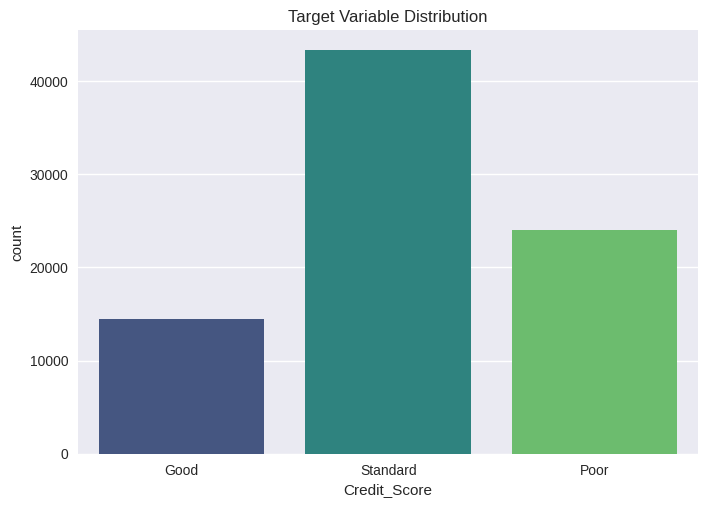

In [ ]:
# Target variable distribution
sns.countplot(x="Credit_Score", data=df, palette="viridis")
plt.title("Target Variable Distribution")
plt.show()


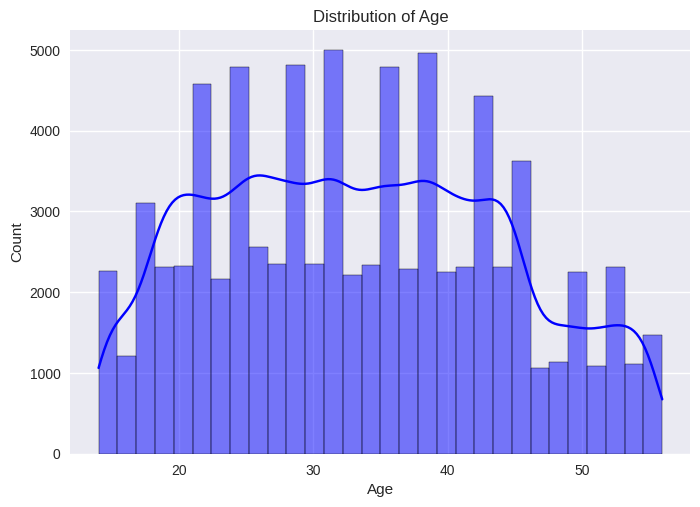

In [ ]:
# Numerical distribution: Age
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Distribution of Age")
plt.show()


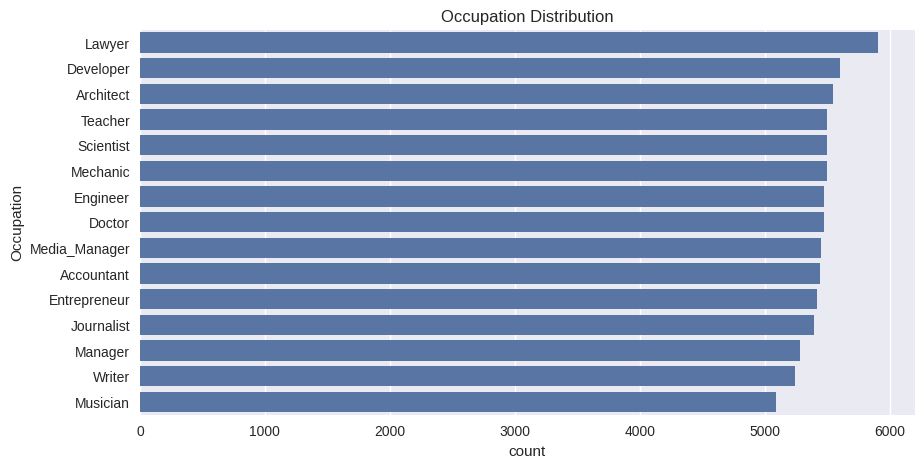

In [ ]:
# Occupation
plt.figure(figsize=(10,5))
sns.countplot(y="Occupation", data=df, order=df['Occupation'].value_counts().index)
plt.title("Occupation Distribution")
plt.show()


6. Bivariate Analysis

/tmp/ipython-input-3298384144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Age", data=df, palette="Set2")


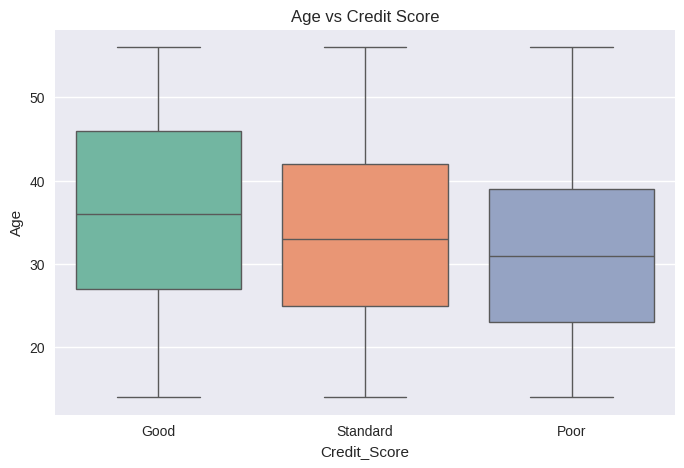

In [ ]:
# Age vs Credit Score
plt.figure(figsize=(8,5))
sns.boxplot(x="Credit_Score", y="Age", data=df, palette="Set2")
plt.title("Age vs Credit Score")
plt.show()


/tmp/ipython-input-3503464307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set1")


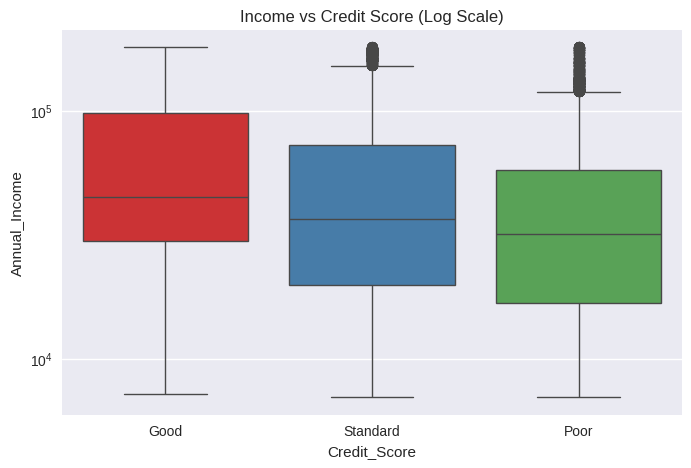

In [ ]:
# Annual Income vs Credit Score
plt.figure(figsize=(8,5))
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set1")
plt.yscale("log")
plt.title("Income vs Credit Score (Log Scale)")
plt.show()


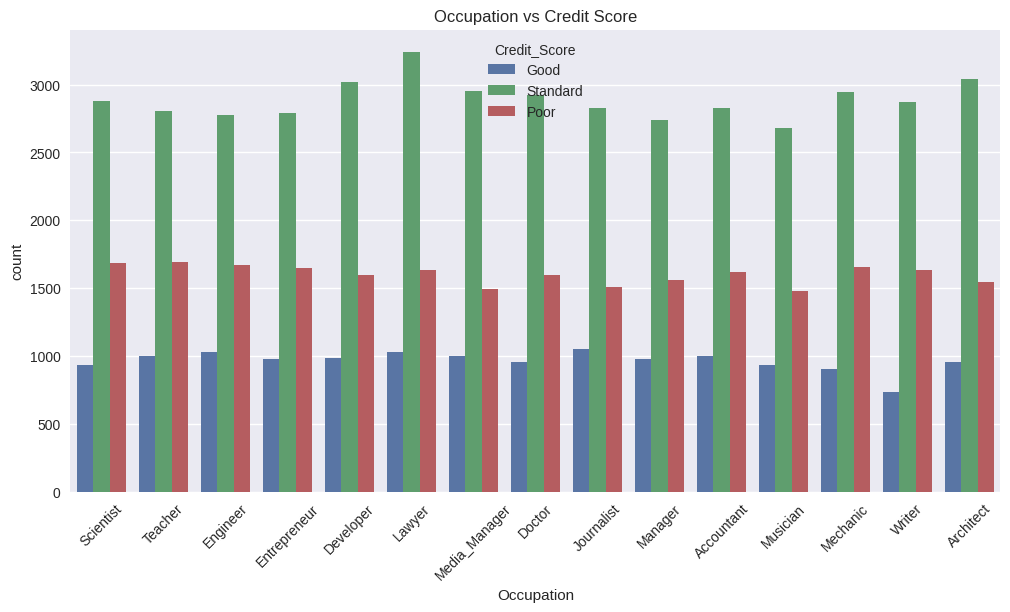

In [ ]:
# Occupation vs Credit Score
plt.figure(figsize=(12,6))
sns.countplot(x="Occupation", hue="Credit_Score", data=df)
plt.xticks(rotation=45)
plt.title("Occupation vs Credit Score")
plt.show()


7. Correlation Analysis

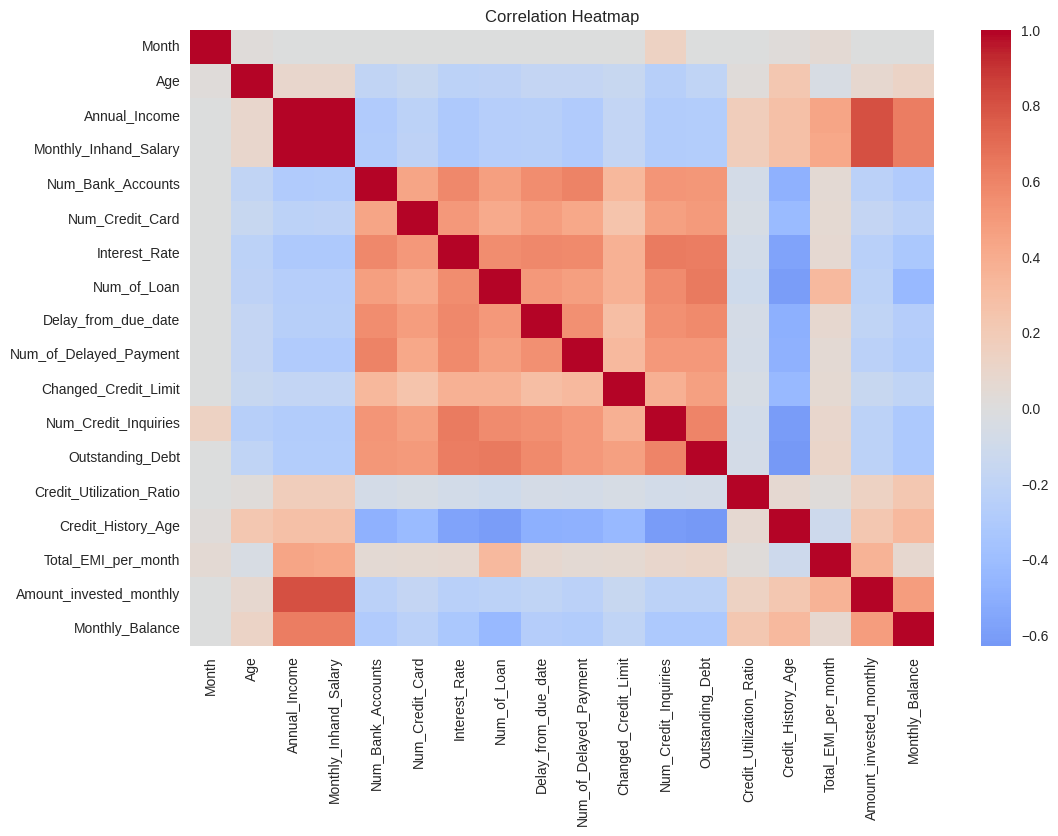

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


8. Insights and Summary

## Markdown :

1. Target distribution (Credit_Score) is slightly imbalanced: "Good" is the majority, followed by "Standard", and "Poor".

2. Age is mostly between 20–60, with younger people having more "Poor" credit scores.

3. Higher income correlates with "Good" credit score, while low income correlates with "Poor".

4. Occupation plays a role – Scientists and Engineers have better credit scores compared to Security guards or Mechanics.

5. Number of delayed payments and outstanding debt are strongly correlated with poor credit scores.

6. Missing values exist in features like Monthly_Balance → require imputation.

7. Some numeric features are skewed (Annual_Income, Outstanding_Debt) → may need scaling/log transformation later.

Part B - Feature Engineering and Model Building

9. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Handle missing values
# -----------------------------
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# -----------------------------
# 2. Encode categorical features
# -----------------------------
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


10. Define Features (X) and Traget (y)

In [ ]:
# -----------------------------
# 3. Define Features (X) and Target (y)
# -----------------------------
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (81782, 23)
Target shape: (81782,)


11. Train-Test Split

In [ ]:
# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

# Quick sanity check
df.head()

Train set: (65425, 23)
Test set: (16357, 23)


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,107,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,107,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,107,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,107,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,107,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


12. Model Training – Baseline Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Scale the features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="saga")
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.48      0.81      0.60      2891
           1       0.62      0.66      0.64      4803
           2       0.79      0.58      0.67      8663

    accuracy                           0.64     16357
   macro avg       0.63      0.68      0.64     16357
weighted avg       0.69      0.64      0.65     16357



In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2891
           1       0.81      0.86      0.83      4803
           2       0.86      0.82      0.84      8663

    accuracy                           0.83     16357
   macro avg       0.82      0.83      0.83     16357
weighted avg       0.83      0.83      0.83     16357



In [ ]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      2891
           1       0.78      0.77      0.77      4803
           2       0.81      0.80      0.81      8663

    accuracy                           0.79     16357
   macro avg       0.77      0.78      0.77     16357
weighted avg       0.79      0.79      0.79     16357



13. Model Evaluation- Confusion Matrices

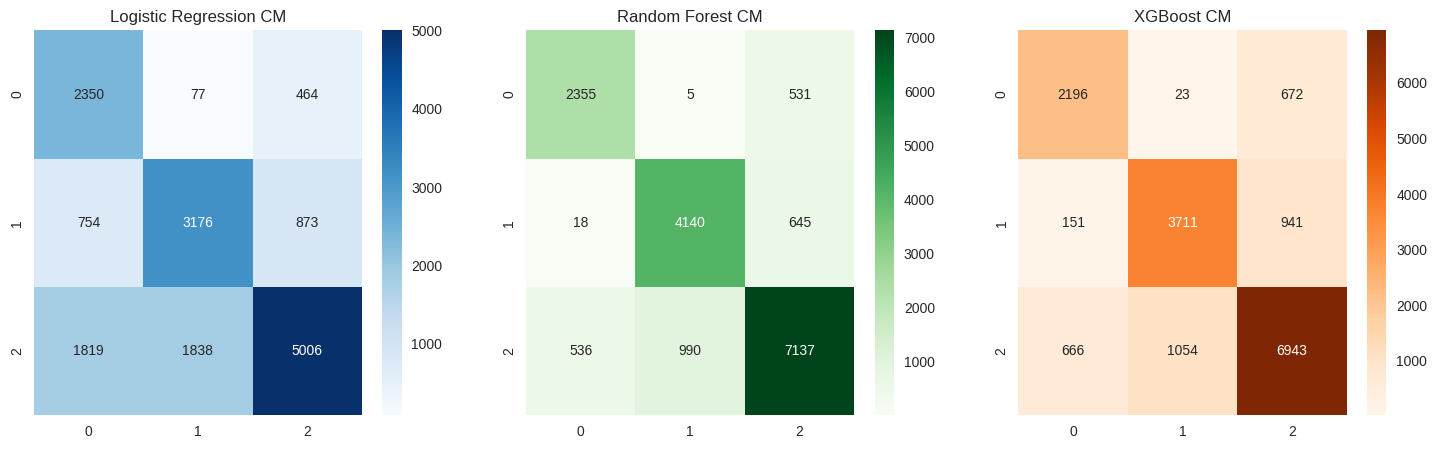

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression CM")

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest CM")

# XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("XGBoost CM")

plt.show()


14. Feature Importance(Tree-based Models)

/tmp/ipython-input-2297041624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


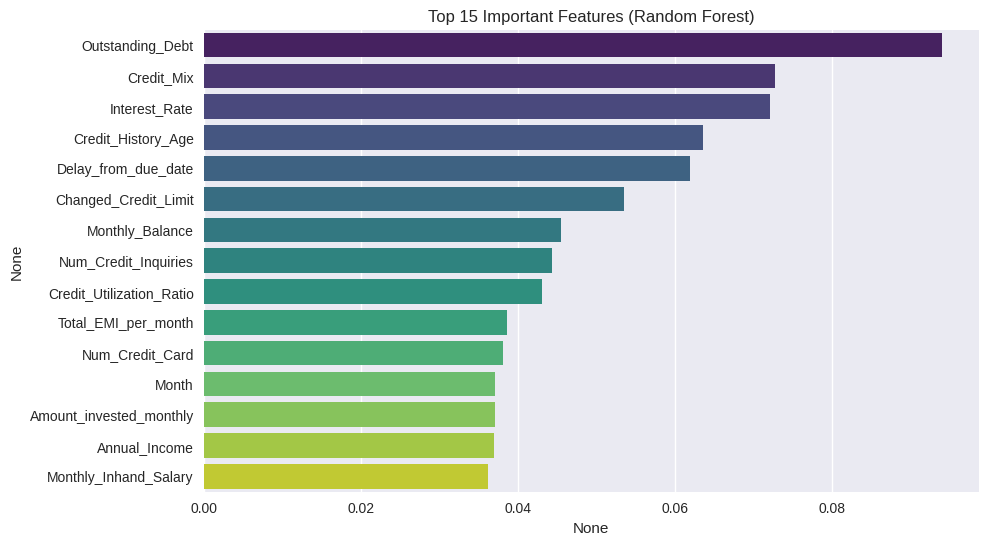

In [ ]:
# Random Forest Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Top 15 Important Features (Random Forest)")
plt.show()


15.Final Insights

## **Markdown (summary):**

1. Random Forest and XGBoost perform better than Logistic Regression on this dataset.

2. Important features for predicting Credit Score include:

    * Outstanding_Debt

    * Num_of_Delayed_Payment

    * Monthly_Balance

    * Annual_Income

    * Credit_Mix

3. Income and occupation strongly influence whether a person has a Good vs Poor credit score.

4. Credit history length and number of loans also add predictive power.

5. Further improvements could include:

    * Hyperparameter tuning with GridSearchCV/RandomizedSearchCV

    * Using SMOTE to handle class imbalance

    * Building stacked/ensemble models

## ***Conclusion:***
  The analysis of financial and demographic data provided valuable insights into the factors influencing credit scores. Exploratory Data Analysis revealed strong relationships between income, outstanding debt, repayment history, and overall creditworthiness. Machine learning models such as Random Forest and XGBoost outperformed baseline methods, offering reliable predictions of credit score categories. Feature importance analysis highlighted debt levels, delayed payments, and income as critical drivers of credit classification. This project demonstrates how data-driven approaches can enhance financial decision-making, reduce lending risks, and support fair credit evaluation. Future improvements include hyperparameter tuning, handling class imbalance, and deploying models for real-world use.